### Calculation of polaron migration barriers using linear interpolation
In this example we show how to calculate polaron migration barrier on the example of LiFePO4


In [15]:
from IPython.display import Image


from siman.calc_manage import smart_structure_read,  add, res
from siman.geo import interpolate
from siman.set_functions import read_vasp_sets
from siman.database import write_database, read_database
%matplotlib inline

In [9]:
st = smart_structure_read('in/POSCAR_LiFePO4_1u_1_end') #read LiFePO4 structure
# st.printme()

In [10]:
st1 = st.localize_polaron(26,  -0.2) # displace surrounding oxygens by 0.2 A in the direction of iron, corresponding to oxidation
st2 = st.localize_polaron(27, -0.2)
st1.write_poscar() # write POSCAR to check in jmol that the correct displacement was performed
st2.write_poscar()

-- POSCAR was written to /hdd/home/aksenov/Simulation_wrapper/siman/tutorials/xyz/POSCAR__LiFePO4_1u_1_endpol27 

-- POSCAR was written to /hdd/home/aksenov/Simulation_wrapper/siman/tutorials/xyz/POSCAR__LiFePO4_1u_1_endpol28 



'/hdd/home/aksenov/Simulation_wrapper/siman/tutorials/xyz/POSCAR__LiFePO4_1u_1_endpol28'

In [12]:
# *images* is the number of intermediate structures
# *write_poscar* write files to folder *poscar_folder*  
interpolate(st1, st2, images = 10, write_poscar = 1, omit_edges = 0, poscar_folder = 'xyz/' ) # create intermediate structures by linerar interpolation between st1 and st2

-- POSCAR was written to xyz/1.POSCAR 

-- POSCAR was written to xyz/2.POSCAR 

-- POSCAR was written to xyz/3.POSCAR 

-- POSCAR was written to xyz/4.POSCAR 

-- POSCAR was written to xyz/5.POSCAR 

-- POSCAR was written to xyz/6.POSCAR 

-- POSCAR was written to xyz/7.POSCAR 

-- POSCAR was written to xyz/8.POSCAR 

-- POSCAR was written to xyz/9.POSCAR 

-- POSCAR was written to xyz/10.POSCAR 

-- POSCAR was written to xyz/11.POSCAR 

-- POSCAR was written to xyz/12.POSCAR 



1. Check all intermediate images by opening them simulteniously in Jmol and clicking next frame
2. Make a shell script that launches VASP for:
   a) for 1.POSCAR, 2.POSCAR ... 12.POSCAR in a loop (forward branch)
   b) for 12.POSCAR 11.POSCAR ... 1.POSCAR in a loop (backward branch)
3. Plot Total energy vs structure number for forward and backward branches on one figure
4. Make sure that  ISTART	= 1; LWAVE  =  .TRUE.; ICHARG = 0; in your INCAR 

In [23]:
read_database() # read saved database if available
#Creating new sets for DFT+U calculations from predifined set 'static'
dftu_packet = {'ISTART'   :1,   'ICHARG':1,  'LDAUTYPE':2, 'LASPH':'.TRUE.', 
                'LDAUPRINT':2, 'LMAXMIX' :4, 'LDAU' :'.TRUE.',
                'LDAUL':{'Cu':2, 'Ti':2,   'Nb':2,   'Co':2  , 'Fe':2  , 'Ni':2  , 'Mn':2  , 'V':2   , 'Cr':2, 'Mo':2 },
                'LDAUU':{'Cu':4.0, 'Ti':0,   'Nb':1.5, 'Co':3.4, 'Fe':4.0, 'Ni':6.2, 'Mn':3.9, 'V':3.1 , 'Cr':3.5, 'Fe/S':1.9, 'Mo':3 },
                'LDAUJ':{'Cu':0.0, 'Ti':0.0, 'Nb':0.0, 'Co':0.0, 'Fe':0.0, 'Ni':0.0, 'Mn':0.0, 'V':0.0 , 'Cr':0.0, 'Fe/S':0 , 'Mo':0  } } # universal set, Jain2011 azh values, Ni from genome
mag_packet = {
    'GGA_COMPAT': '.FALSE.',
    'ISPIN':2,
    'LORBIT':11, #more info
    'magnetic_moments':{'Ti':0.6, 'Nb':0.6, 'V':5, 'Fe':5, 'Co':5, 'Mn':5, 'Ni':5, 'Cr':5, }
}

read_vasp_sets([('1', 'static', {'ISIF':2, 'NSW':25, 'EDIFFG':-0.025}, 'override')]) #new set '1' from 'static' with 'NSW' = 2
read_vasp_sets([('1m', '1',mag_packet , 'override')]) #new set '1m' from '1'
read_vasp_sets([('1u', '1m',dftu_packet , 'override')]) #new set '1u' from '1m'
header.varset['1u'].printme()


Attention! You have chosen to override set 1
 

Warning! You did not change  ISIF  in 1 set
 


Attention! You have chosen to override set 1m
 


Attention! You have chosen to override set 1u
 

-- s.params['ISTART']             = 1  
-- s.params['NELM']               = 50  
-- s.params['EDIFF']              = 1e-05  
-- s.params['NSW']                = 25  
-- s.params['EDIFFG']             = -0.025  
-- s.params['IBRION']             = 1  
-- s.params['ISIF']               = 2  
-- s.params['PREC']               = Normal  
-- s.params['ALGO']               = Normal  
-- s.params['ENCUT']              = 400  
-- s.params['ENAUG']              = 700.0  
-- s.params['KSPACING']           = 0.2  
-- s.params['KGAMMA']             = .TRUE.  
-- s.params['LREAL']              = Auto  
-- s.params['ISMEAR']             = 0  
-- s.params['SIGMA']              = 0.1  
-- s.params['LPLANE']             = .TRUE.  
-- s.params['NPAR']               = 1  
-- s.params['ICHARG']             = 1  


# Calculating polaron migration barrier
The function creates linear interpolation of lattice deformation between two positions *istart* and *ind* 
and calculates two branches.
*images* - number of intermediate images
*istart* - number of atom (counting from zero) with small polaron in its initial position  
*iend* - number of atom (counting from zero) with small polaron in its final position   
*polaron_type* - 'hole' or 'electron'
*amp* - amplitude of polaron distortion in A (displacement of ligand around the TM center), the sign is determined automatically depending on the type of the polaron

### Attention! *~/tools/siman/\**.py should be present on cluster! Copy siman/siman folder to ~/tools/ 

In [24]:
from siman import header
header.warnings = 'yY'
st = smart_structure_read('in/POSCAR_LiFePO4_1u_1_end') #read LiFePO4 structure
# here run=1 means that the calculation will be immidiately started on cluster
add('LiFePO4.PHtest', '1u', 1, run = 0, up = 'up2', input_st = st, it_folder = 'LiFePO4/PH/', calc_method = 'polaron', 
    params = {'polaron':{'images':7, 'istart':24, 'iend':25, 'polaron_type':'hole', 'amp':0.12}}, cluster = 'cee', show ='fo')


-- POSCAR was written to xyz/LiFePO4.PHtest/1.POSCAR 

-- POSCAR was written to xyz/LiFePO4.PHtest/100.POSCAR 

-- POSCAR was written to xyz/LiFePO4.PHtest/3.POSCAR 

-- POSCAR was written to xyz/LiFePO4.PHtest/4.POSCAR 

-- POSCAR was written to xyz/LiFePO4.PHtest/5.POSCAR 

-- POSCAR was written to xyz/LiFePO4.PHtest/6.POSCAR 

-- POSCAR was written to xyz/LiFePO4.PHtest/7.POSCAR 

-- POSCAR was written to xyz/LiFePO4.PHtest/8.POSCAR 

-- POSCAR was written to xyz/LiFePO4.PHtest/9.POSCAR 

-- Warning! File ./LiFePO4/PH//LiFePO4.PHtest/LiFePO4.PHtest.auto_created_for_polaron.1.geo was replaced 

-- POSCAR was written to LiFePO4/PH///LiFePO4.PHtest.1u/2.POSCAR 

-- Number of elements is even! trying to find all antiferromagnetic orderings: 

-- Total number of orderings is  6 

-- check_kpoints(): Kpoint   mesh is:  [4, 6, 7] 

-- check_kpoints(): The actual k-spacings are  [0. 0. 0.] 

-- POSCAR was written to LiFePO4/PH///LiFePO4.PHtest.1u/1.POSCAR 

{'images': 7, 'istart': 24, 'iend

'LiFePO4.PHtest'

In [28]:
#To read results, run:

res('LiFePO4.PHtest', '1u', 1, up = 'up2', analys_type = 'polaron', readfiles = 1)


The following TM are found: [26]

 Znucl:   26
  4.30   3.80   3.78   3.78 


--                           |  energy(eV)|    Vector lenghts (A)   | Stresses (MPa)     | N MD, N SCF    


Max. F. tot  (meV/A) =  [2353 3401 2902  564  683  736  212  418  166  173  139  168  176   93
  117  144  140   86   59   53   56   29   67   24] 

-- db['LiFePO4.PHtest.1u.1']     |LiFePO4.PHtest.1u.1| -196.1801  |10.45, 6.09, 4.75|-11443,-11884,-10286 |  24, 7,189    
The following TM are found: [26]

 Znucl:   26
  3.80   4.30   3.78   3.78 


--                           |  energy(eV)|    Vector lenghts (A)   | Stresses (MPa)     | N MD, N SCF    


Max. F. tot  (meV/A) =  [2373 3010 2613  874  787  569  216  290  215  265  182  137  100  183
   76   81   52   49   48   50   57   42   40   39   36] 

-- db['LiFePO4.PHtest.1u.2']     |LiFePO4.PHtest.1u.2| -196.1779  |10.45, 6.09, 4.75|-11557,-11940,-10339 |  25,14,354    
The following TM are found: [26]

 Znucl:   26
  4.30   3.80   3.78   3.78 



(["db['LiFePO4.PHtest.1u.1']     |LiFePO4.PHtest.1u.1| -196.1801  |10.45, 6.09, 4.75|-11443,-11884,-10286 |  24, 7,189   "],
 [])

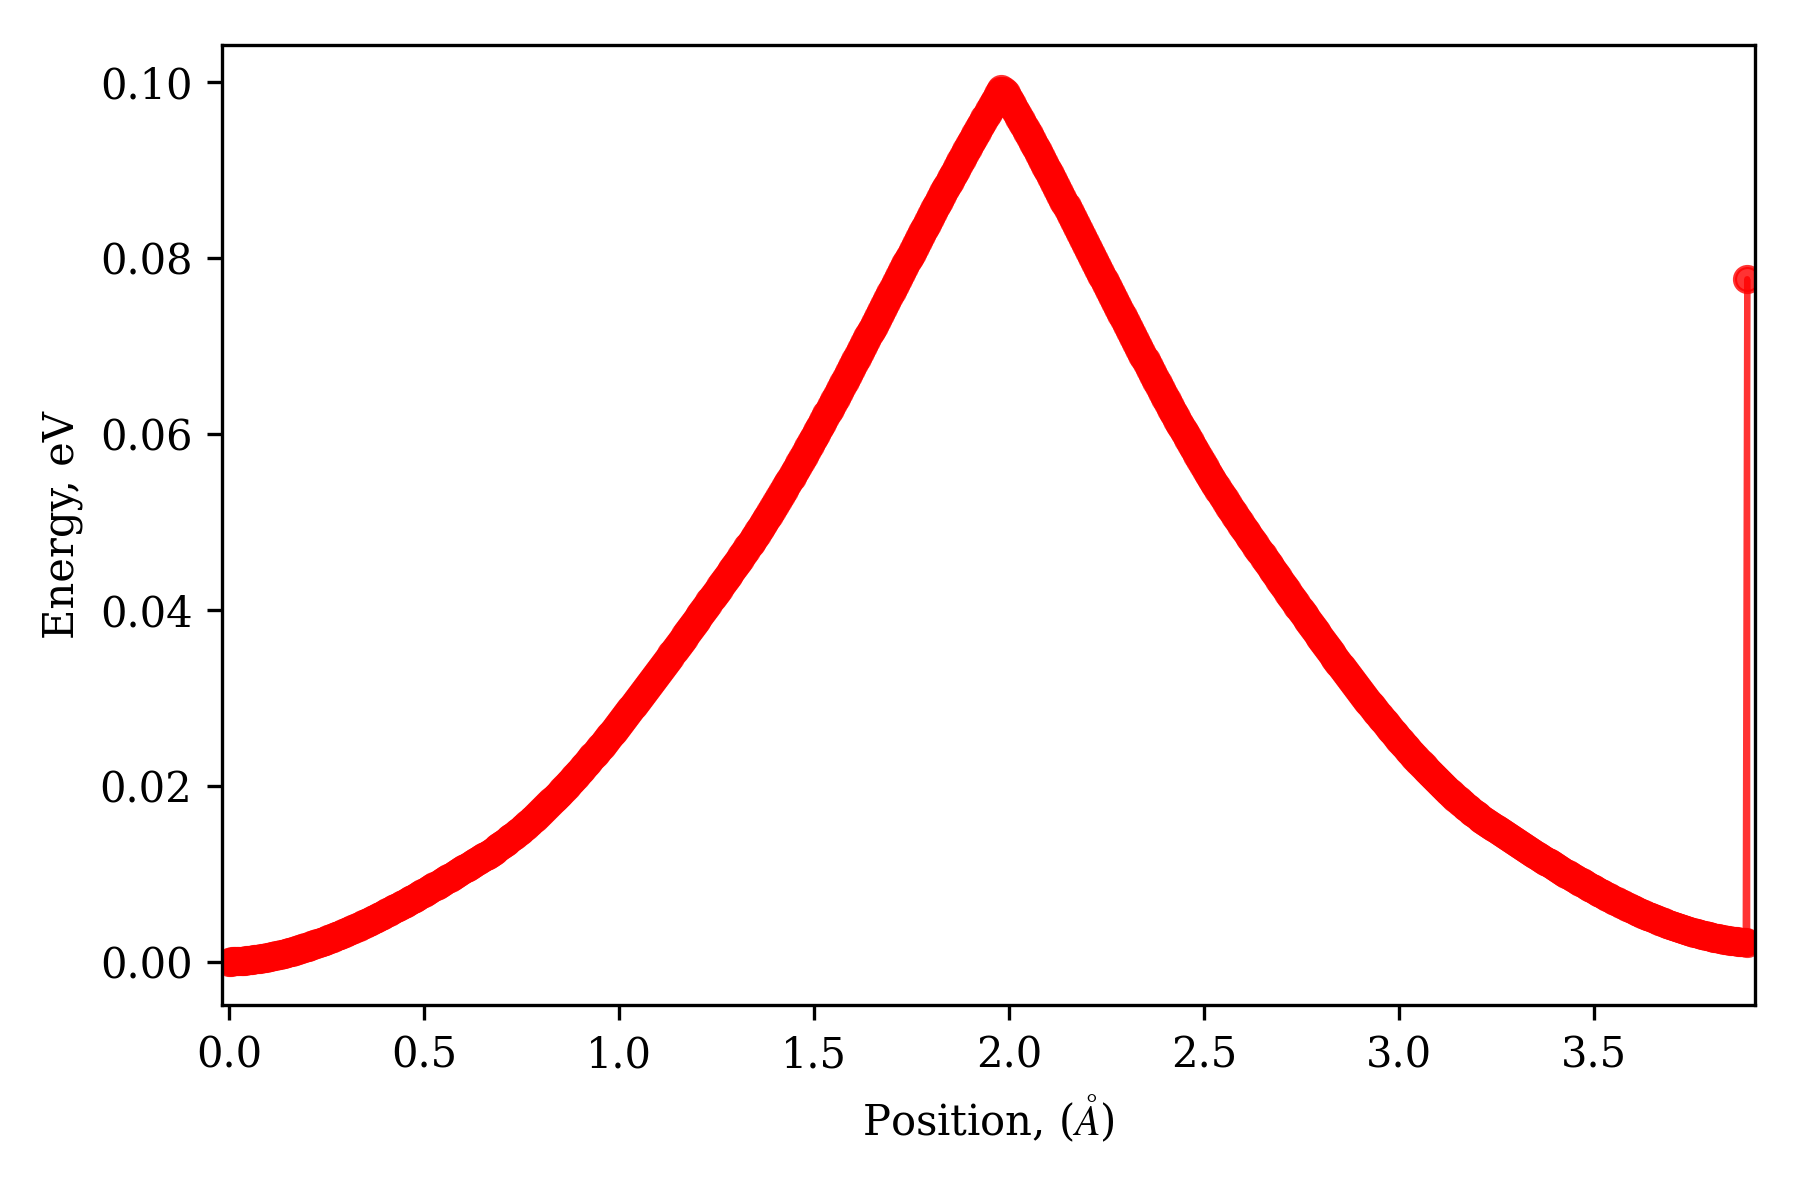

In [29]:
Image(filename=('./figs/png/polmep.LiFePO4.PHtest.1u.U4.0.png'))


In [5]:
write_database()

-- Opening  only_calc.gdbm3 for writing 


End of work at 2023-02-08 12:24:06.016428
 


Database has been successfully updated

